In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [3]:
def exp_taylor_series(X: float, N: int, A: float) -> float:
    n = np.array(range(N+1))
    a = (X - A)**n

    factorials = []
    for number in n:
        factorials.append(math.factorial(number))
    factorials_array = np.array(factorials)

    a = a / factorials_array

    deriv = np.empty(N+1)
    deriv.fill(np.exp(A))
    return np.dot(a, deriv)

In [4]:
def cos_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
    return result

def sin_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
    return result

In [20]:
class taylor_series:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 100, lower_bound = -5, upper_bound = 5):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, func="exponential"):
        assert func in ["exponential", "cosine", "sine"]
        
        if func == "exponential":
            taylor=exp_taylor_series
            function = np.exp
        elif func == "cosine":
            taylor = cos_taylor_series
            function = np.cos
        elif func == "sine":
            taylor = sin_taylor_series
            function = np.sin
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        taylor_ys = [taylor(x, **self.params) for x in self.xs]
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, taylor_ys, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.max(y)*2/3, s = f"Order = {self.params['N']}")
        plt.text(x = lower_bound, y = np.max(y)*3/4, s = f"Function = {func}")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.set_params(N=i, A = A)
            self.plot_function(func = func)
            display(plt.gcf())
            plt.close()
            time.sleep(1)
            clear_output(wait=True) 


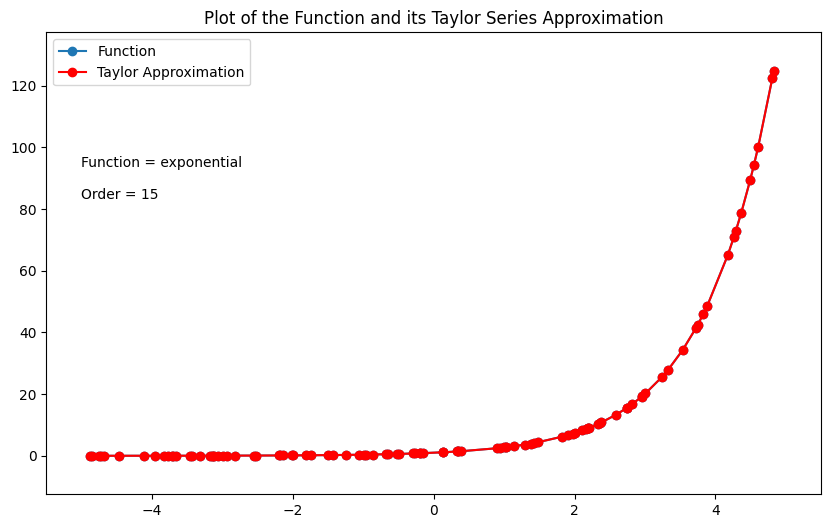

<Figure size 640x480 with 0 Axes>

In [21]:
TaylorSeries = taylor_series()
TaylorSeries.visualize_plots(N = 15, A = 0, func = "exponential")

In [44]:
def relu(x):
    return np.maximum(0, x)

In [99]:
def initialize_weights(layer_dims):
    params = {}
    params["layers"] = len(layer_dims)
    for l in range(1,len(layer_dims)):
        params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
        params["b" + str(l)] = np.zeros((layer_dims[l],1))
    return params 

In [91]:
def cost(ypred, y):
    m = len(y)
    return(np.sum((ypred - y)**2)/m)

In [103]:
def forward_propagation(X, y, params):
    cache = {}
    
    layers = params["layers"]
    W1 = params["W1"]
    b1 = params["W2"]
    
    Zl = np.dot(X, W1) + b1
    Al = relu(Zl)
    
    cache["Z1"] = Zl
    cache["A1"] = Al
    
    for l in range(2, layers):
        Wl = params["W" + str[l]]
        bl = params["b" + str(l)]
        
        Zl = np.dot(Zl, Wl) + bl
        Al = relu(Zl)
        
        cache["Z" + str(l)] = Zl
        cache["A" + str(l)] = Al
        
    return Al, cache

In [ ]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [105]:
def backward_propagation(cache, params, y):
    layers = params["layers"]
    grads = {}
    
    Al = cache["A" + str(layers)]
    dAl = -2 * (y - Al)
    dZl = dAl * relu_derivative(cache["Z" + str(layers)])
    
    for l in range(layers, 0, -1):
        Al_minus_1 = cache["A" + str(l-1)] if l > 1 else X
        
        grads["dW" + str(l)] = np.dot(Al_minus_1.T, dZl) / y.shape[0]
        grads["db" + str(l)] = np.mean(dZl, axis=0)
        
        if l > 1:
            dAl = np.dot(dZl, params["W" + str(l)].T)
            dZl = dAl * relu_derivative(cache["Z" + str(l-1)])
    
    return grads
